In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
salary = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\SalaryData_Train.csv")
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_test = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\SalaryData_Test.csv")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## EDA

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
salary.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


## Data Visualizations

[0.22264855 0.05039902 0.0356485  0.09133487 0.07510431 0.09101244
 0.10250726 0.01886366 0.02747042 0.12452753 0.0384751  0.12200834]


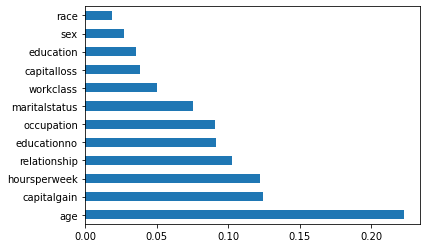

In [9]:
import pandas as pd
import numpy as np
#data = pd.read_csv("C://Users//Intel//Documents//mobile_price_train.csv")
X = s_train.iloc[:,0:12]  #independent variable columns
Y = s_train.iloc[:,-1]    #target variable column (price range)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
 
#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

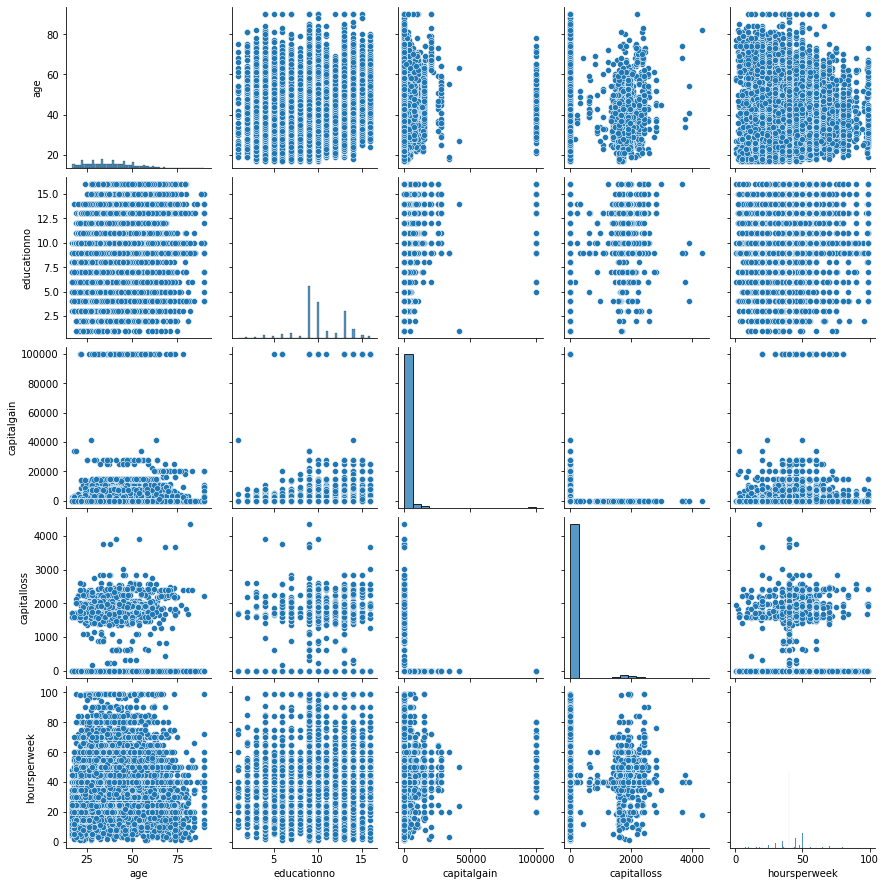

In [12]:
sns.pairplot(salary)

In [5]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

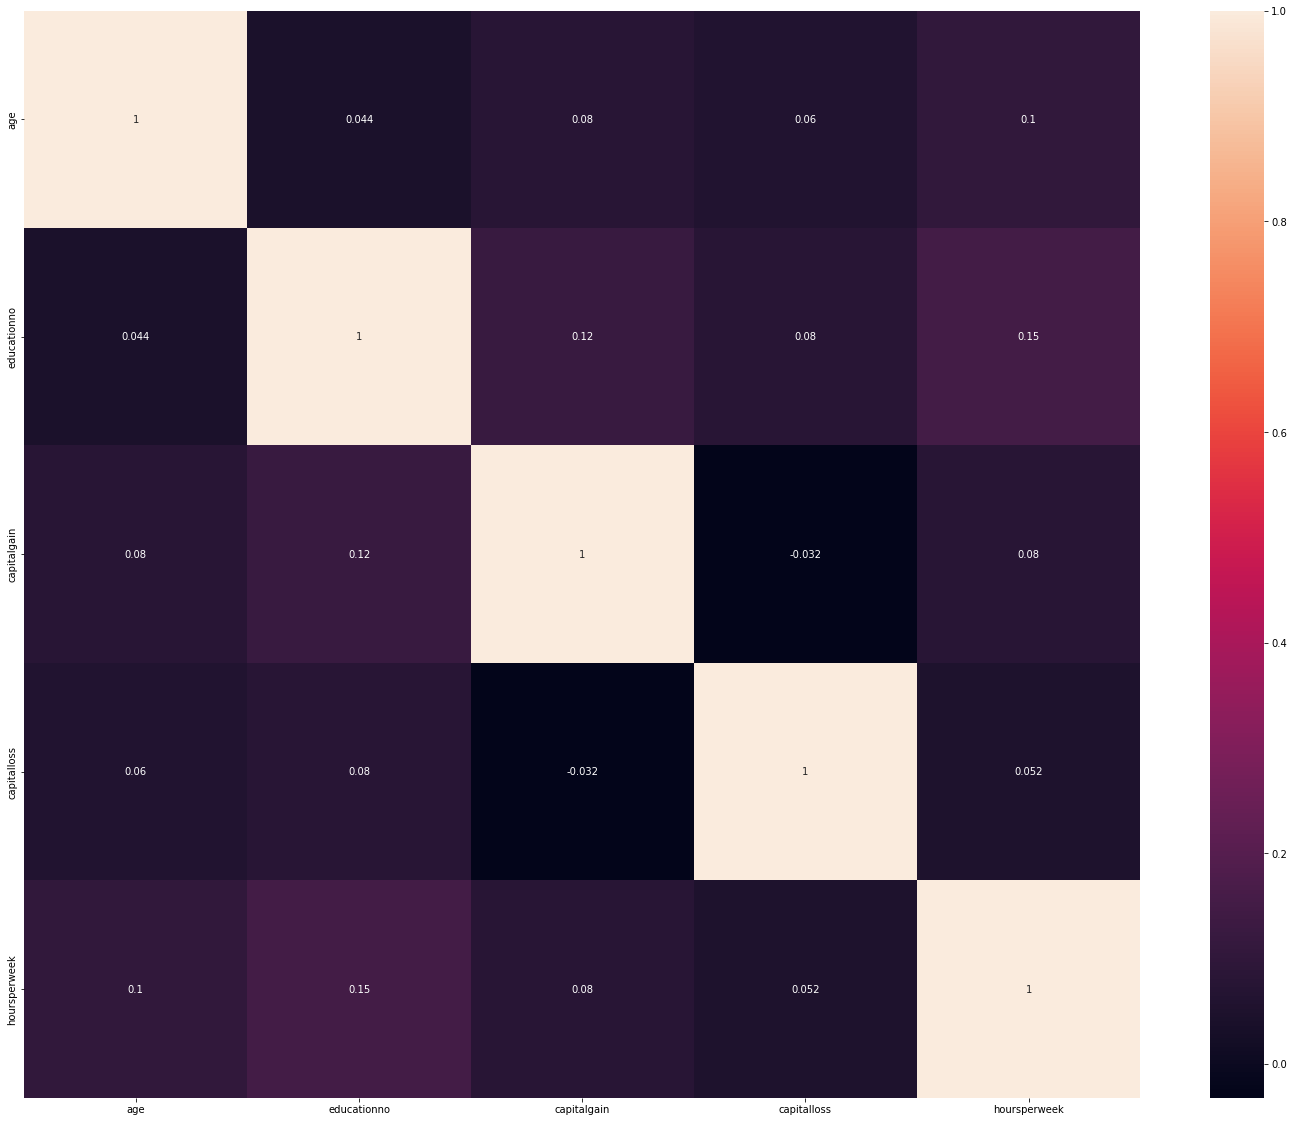

In [15]:
plt.figure(figsize=(25,20))
sns.heatmap(salary.corr(),annot=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

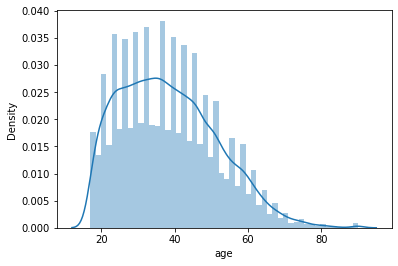

In [14]:
sns.distplot(salary['age'])

c:\users\jhishna2022\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

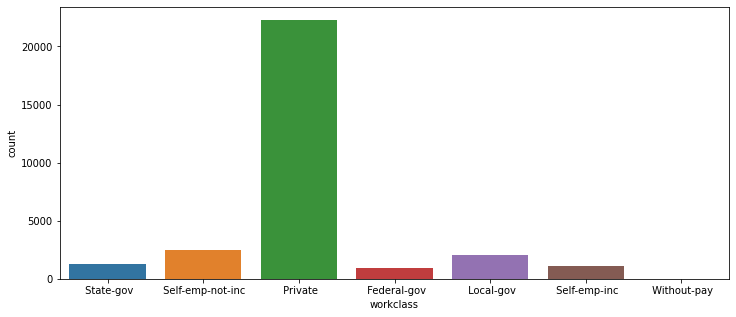

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.countplot(salary['workclass'])

<AxesSubplot:xlabel='education', ylabel='count'>

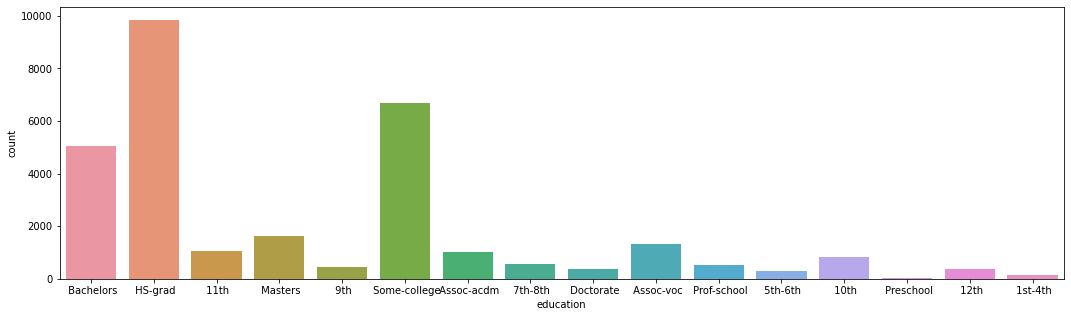

In [8]:
plt.figure(figsize=(18,5))
sns.countplot(salary['education'])

<AxesSubplot:xlabel='educationno', ylabel='count'>

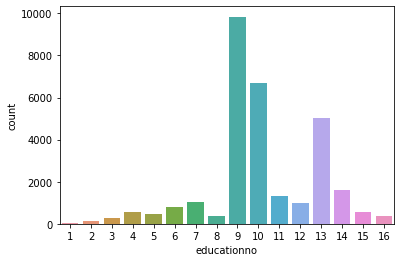

In [17]:
sns.countplot(salary['educationno'])

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

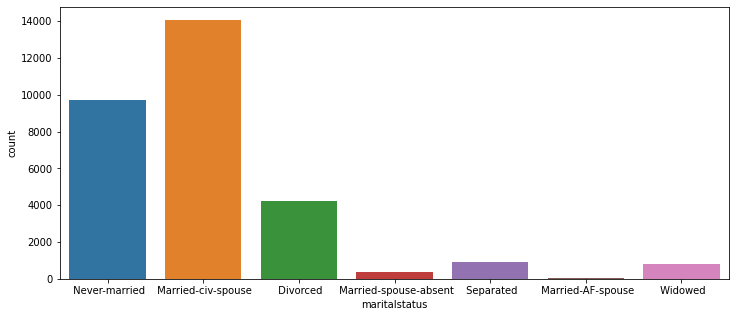

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(salary['maritalstatus'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

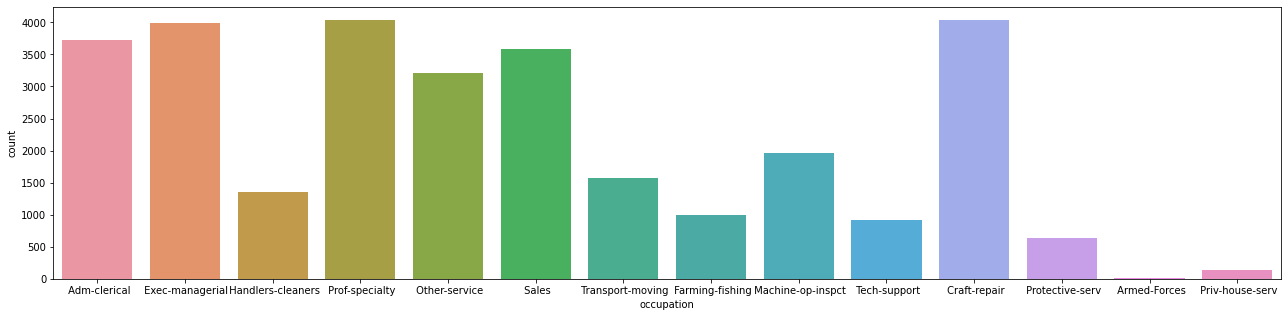

In [12]:
plt.figure(figsize=(22,5))
sns.countplot(salary['occupation'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

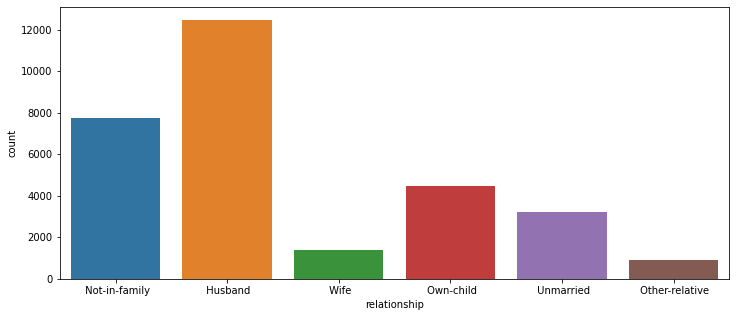

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(salary['relationship'])

<AxesSubplot:xlabel='race', ylabel='count'>

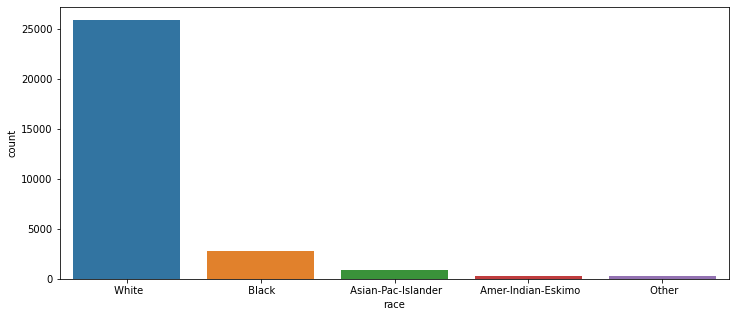

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(salary['race'])

<AxesSubplot:xlabel='sex', ylabel='count'>

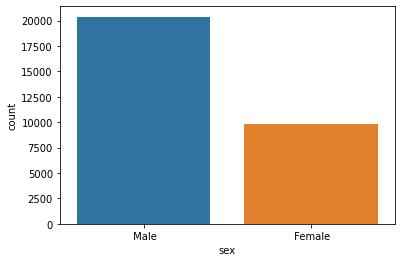

In [22]:
sns.countplot(salary['sex'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

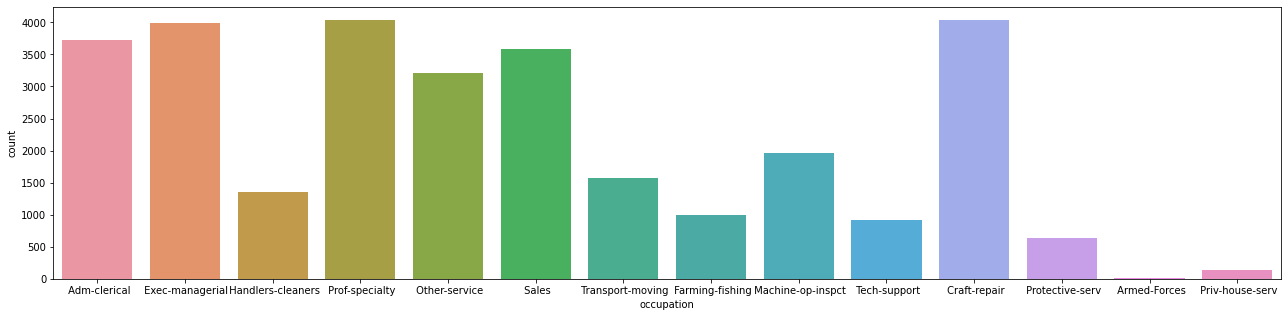

In [15]:
plt.figure(figsize=(22,5))
sns.countplot(salary['occupation'])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

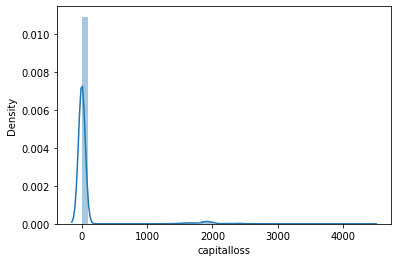

In [26]:
sns.distplot(salary['capitalloss'])

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

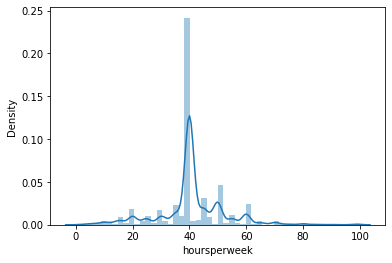

In [29]:
sns.distplot(salary['hoursperweek'])

In [17]:
X_train = pd.get_dummies(salary.iloc[:,:-1])
Y_train = salary.iloc[:,-1]
X_test = pd.get_dummies(salary_test.iloc[:,:-1])
Y_test = salary_test.iloc[:,-1]

In [18]:
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
Y_train.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [14]:
X_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
Y_test.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [20]:
import numpy as np
import pylab as pl

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

### The no. of columns are high, so I will use PCA

#### Normalization using StandardScaler

In [21]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [22]:
from sklearn.decomposition import PCA

X_train_pca = PCA(n_components = 102)
X_train_pca_values = X_train_pca.fit_transform(X_train_norm)
print(X_train_pca_values)

X_test_pca = PCA(n_components = 102)
X_test_pca_values = X_test_pca.fit_transform(X_test_norm)
X_test_pca_values

[[-5.50838008e-01 -2.38164986e+00 -5.91921169e-01 ... -1.79532617e-15
  -9.34415883e-15  1.13972556e-15]
 [ 2.81915829e+00 -1.37085459e+00 -4.81126421e-02 ...  4.22376739e-15
  -7.75657164e-16  5.13740185e-16]
 [-7.93831525e-01  8.71803957e-01 -1.20213150e+00 ... -2.08551838e-16
  -2.12830688e-15  4.48793477e-16]
 ...
 [-2.37835145e+00 -7.98690413e-01  3.39105780e-01 ...  3.46535844e-17
   3.19831668e-17  3.53088594e-17]
 [-1.97547719e+00  1.19305162e+00 -1.82899406e+00 ...  2.62415224e-17
  -2.19256514e-17  2.61499175e-17]
 [ 7.62131786e-01 -1.77200870e+00  5.36971989e-01 ...  8.38734495e-17
  -3.49378560e-16  5.00319670e-17]]


array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
         1.92817773e-14,  8.30910128e-16, -1.58428838e-15],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
        -8.62085601e-15,  5.43152267e-16, -5.80972044e-15],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
         1.31286230e-15, -1.10113540e-15,  1.93760049e-15],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
         4.59891290e-18, -8.37082305e-18,  9.65662668e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
         5.87381929e-16, -2.54421165e-16,  6.10157290e-16],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
        -2.33411350e-17,  6.86567346e-18, -2.11621488e-16]])

#### The amount of variance explained by PCA

In [23]:
var = X_train_pca.explained_variance_ratio_
var

array([4.47952203e-02, 3.03018755e-02, 2.56772664e-02, 2.30740938e-02,
       1.90544461e-02, 1.75159608e-02, 1.66112958e-02, 1.51765356e-02,
       1.40918479e-02, 1.37139289e-02, 1.30161578e-02, 1.27145892e-02,
       1.22845420e-02, 1.20633855e-02, 1.19277829e-02, 1.17776199e-02,
       1.15732784e-02, 1.14595050e-02, 1.12290572e-02, 1.10955712e-02,
       1.09763472e-02, 1.09664173e-02, 1.08013630e-02, 1.07163253e-02,
       1.06965233e-02, 1.06243926e-02, 1.05150466e-02, 1.04401201e-02,
       1.04195534e-02, 1.03772631e-02, 1.02585913e-02, 1.02518285e-02,
       1.02343018e-02, 1.02011311e-02, 1.01746044e-02, 1.00893885e-02,
       1.00693090e-02, 1.00007488e-02, 9.97967518e-03, 9.93621541e-03,
       9.91132587e-03, 9.87257873e-03, 9.85864172e-03, 9.85346688e-03,
       9.83507641e-03, 9.82654639e-03, 9.82141035e-03, 9.81950938e-03,
       9.81361594e-03, 9.80760489e-03, 9.80531422e-03, 9.80056163e-03,
       9.79178710e-03, 9.77352236e-03, 9.77198782e-03, 9.75826765e-03,
      

##### Cumulative Variance

In [24]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([  4.48,   7.51,  10.08,  12.39,  14.3 ,  16.05,  17.71,  19.23,
        20.64,  22.01,  23.31,  24.58,  25.81,  27.02,  28.21,  29.39,
        30.55,  31.7 ,  32.82,  33.93,  35.03,  36.13,  37.21,  38.28,
        39.35,  40.41,  41.46,  42.5 ,  43.54,  44.58,  45.61,  46.64,
        47.66,  48.68,  49.7 ,  50.71,  51.72,  52.72,  53.72,  54.71,
        55.7 ,  56.69,  57.68,  58.67,  59.65,  60.63,  61.61,  62.59,
        63.57,  64.55,  65.53,  66.51,  67.49,  68.47,  69.45,  70.43,
        71.4 ,  72.37,  73.34,  74.31,  75.28,  76.24,  77.2 ,  78.16,
        79.12,  80.07,  81.01,  81.95,  82.89,  83.82,  84.75,  85.66,
        86.57,  87.47,  88.36,  89.24,  90.11,  90.97,  91.82,  92.66,
        93.49,  94.28,  95.05,  95.77,  96.49,  97.14,  97.75,  98.35,
        98.88,  99.36,  99.79, 100.03, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05])

##### Variance plot for PCA components obtained

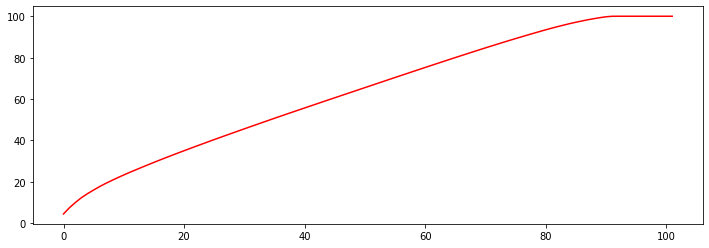

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

##### Selecting first 90 components of PCA

In [26]:
train_final = pd.concat([pd.DataFrame(X_train_pca_values[:,0:90]),Y_train], axis = 1)
train_final

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,0.925827,0.366843,0.762292,0.955908,-0.431471,-0.253518,-0.090683,1.446239,0.537054,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,1.715245,-0.684681,0.173783,-1.120804,1.043838,-1.127099,0.538383,-0.179721,0.006457,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.666397,-0.126942,-0.368158,0.399572,0.094164,-0.001750,-0.622668,0.114582,0.079789,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.058897,0.409911,0.952768,0.193645,0.292208,0.033568,-0.226799,-0.779685,0.367130,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-1.388747,0.857151,-1.132278,0.924125,0.087501,-0.409813,-0.711475,0.566080,-1.599465,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.680328,0.177364,-0.265304,-0.170305,0.307492,-0.087299,-0.407937,1.072890,-0.389103,<=50K
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,0.603116,-0.279650,0.035936,0.532717,-0.070438,-0.160400,0.100112,-0.124855,0.253184,>50K
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,-1.205160,0.177494,0.668585,0.528450,0.580482,0.156868,-0.442096,0.753165,-0.657852,<=50K
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,1.329776,-0.312235,0.180269,-1.124998,0.500770,-0.047237,-0.227867,0.993340,-0.939524,<=50K


In [27]:
test_final = pd.concat([pd.DataFrame(X_test_pca_values[:,0:90]),Y_test],axis=1)
test_final

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-2.242938,2.603181,-0.327617,2.062024,-3.245808,0.812560,-0.442784,-1.685650,0.924250,1.891991,...,0.322344,-0.266021,0.252272,-0.426056,0.051791,0.853665,-0.773508,0.466166,-0.064770,<=50K
1,2.226904,1.594715,-0.732083,-0.582928,0.054350,0.429844,-0.039662,1.000275,0.209847,0.679798,...,-1.039511,0.061724,-0.355513,1.642111,-1.653340,-0.382266,-0.152825,-0.393192,0.398895,<=50K
2,2.307044,-1.168832,-0.200521,0.097952,-1.635067,2.571033,1.024094,-0.651146,-1.099703,-3.652572,...,-0.314783,0.077195,-0.472801,0.653684,1.100821,-0.205823,0.020513,-0.194492,0.308206,>50K
3,1.080755,1.260533,0.937857,-0.024262,-3.174398,-0.970844,-0.340336,-1.973938,-0.711191,1.075373,...,0.651033,0.491425,0.776518,0.289192,0.192050,-0.267516,-0.415089,-0.484431,0.364319,>50K
4,-1.759546,1.778058,-1.256430,0.402017,0.646302,1.112461,-0.656860,0.304387,1.071483,0.751177,...,-0.341200,0.427165,0.069133,-0.864467,0.492786,-0.925634,0.280922,0.994358,-0.493925,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.603437,-1.380653,-1.217944,3.023232,0.463631,0.320846,0.117746,-0.907320,1.101617,0.372391,...,-0.188856,0.102889,0.003352,0.969400,0.325052,1.506765,-0.047672,0.319851,-1.221906,<=50K
15056,-1.670443,-3.020764,0.059822,-0.326201,1.744026,-0.876546,-1.136618,-0.761872,0.720123,-0.079865,...,-0.158983,0.387623,-0.149291,0.919562,0.137806,0.821065,-0.053937,-1.401547,-0.662635,<=50K
15057,2.395832,-1.468597,-0.209425,1.122402,0.364606,-0.944486,0.190120,-1.382649,0.773748,0.171544,...,-0.488672,-0.211695,0.427440,0.216012,0.330597,0.638795,0.215296,-0.532991,-1.089635,<=50K
15058,-1.140395,-1.036781,2.580795,2.251643,-1.495169,-1.684794,-0.913144,2.031935,-0.905050,-0.245674,...,1.018273,2.174690,-0.425788,0.167408,0.560413,2.514837,-0.992345,1.516196,-0.091726,<=50K


##### Since the dataset is huge, we'll use some part of it , to reduce time consumed.

In [28]:
array = train_final.values
X = array[0:1000,0:90]
Y = array[0:1000,90]

array1 = test_final.values
x = array1[0:1000,0:90]
y = array1[0:1000,90]

## SVM

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.5,0.1,.01,.0001],'C':[1,10,100] },
             {'kernel':['linear'],'C':[1,10,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

print("Best parameters are: ",gsv.best_params_)
print("Best Accuracy is: ", gsv.best_score_)

Best parameters are:  {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Accuracy is:  0.834


In [35]:
clf= SVC(C=100, gamma =0.0001, kernel='rbf')
clf.fit(X,Y)
y_pred_test = clf.predict(x)
acc = accuracy_score(y, y_pred_test) * 100
print("Accuracy of test data is(in %) =", acc)
print(confusion_matrix(y, y_pred_test))


Accuracy of test data is(in %) = 79.5
[[666  84]
 [121 129]]


### Ensemble Methods : to further improve the accuracy

##### Bagging

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
modelbag = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model_bag = modelbag.fit(X,Y)
results_bag = model_bag.score(x,y)
print(np.round(results_bag, 4))

0.794


### Random Forest

In [42]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
modelrf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state = seed)
model_rf = modelrf.fit(X,Y)
results_rf = model_rf.score(x,y)
print(np.round(results_rf, 4)*100)

75.2


#### Boosting

In [39]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')


modelada = AdaBoostClassifier(n_estimators=num_trees)
model_ada = modelada.fit(X,Y)
results_boost = cross_val_score(model_ada, x, y, cv=kfold)
print(results_boost.mean()*100)

77.2


### Stacking

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [45]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

In [47]:
#Iteration1

estimators1 = []
model1 = LogisticRegression(max_iter=500)
estimators1.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators1.append(('cart', model2))

model3 = SVC()
estimators1.append(('svm', model3))

model4 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
estimators1.append(('bagging', model4))

model5 = AdaBoostClassifier(n_estimators=num_trees)
estimators1.append(('boosting', model5))

# create the ensemble modelIter
ensemble1 = VotingClassifier(estimators1)
it1 = ensemble1.fit(X,Y)
results1 = cross_val_score(it1, x, y, cv=kfold)
print(results1.mean()*100)


80.20000000000002


In [48]:
# Iteration = 2
estimators2 = []
model6 = LogisticRegression(max_iter=500)
estimators2.append(('logistic', model6))

model7 = DecisionTreeClassifier()
estimators2.append(('cart', model7))

model8 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
estimators2.append(('bagging', model8))

model9 = AdaBoostClassifier(n_estimators=num_trees)
estimators2.append(('boosting', model9))

# create the ensemble model
ensemble2 = VotingClassifier(estimators2)
it2 = ensemble2.fit(X,Y)
results2 = cross_val_score(it2, x, y, cv=kfold)
print("The accuracy is(in %) : ",results2.mean()*100)

The accuracy is(in %) :  78.3


In [52]:
# Iteration = 3
estimators3 = []
model10 = LogisticRegression(max_iter=500)
estimators3.append(('logistic', model10))

model11 = DecisionTreeClassifier()
estimators3.append(('cart', model11))

model12 = AdaBoostClassifier(n_estimators=num_trees)
estimators3.append(('boosting', model12))

# create the ensemble modSel
ensemble3 = VotingClassifier(estimators3)
results3 = cross_val_score(ensemble3, X, Y, cv=kfold)
results3_test = cross_val_score(ensemble3, x, y, cv=kfold)
print("The accuracy on train data is (in %): ",results3.mean()*100)
print("The accuracy on test data is (in %): ",results3_test.mean()*100)

The accuracy on train data is (in %):  81.4
The accuracy on test data is (in %):  78.89999999999999


In [50]:
#Iteration = 4
estimators4 = []
model13 = DecisionTreeClassifier()
estimators4.append(('cart', model13))

model14 = AdaBoostClassifier(n_estimators=num_trees)
estimators4.append(('boosting', model14))

# create the ensemble model
ensemble4 = VotingClassifier(estimators4)
results4 = cross_val_score(ensemble4, X, Y, cv=kfold)
results4_test = cross_val_score(ensemble4, x, y, cv=kfold)
print("Tha accuracy on train data is(in %): ",results4.mean()*100)
print("Tha accuracy on test data is(in %): ",results4_test.mean()*100)

Tha accuracy on train data is(in %):  79.9
Tha accuracy on test data is(in %):  78.10000000000001


In [51]:
#Iteration = 5
estimators5 = []
model15 = LogisticRegression(max_iter=500)
estimators5.append(('logistic', model15))

model16 = AdaBoostClassifier(n_estimators=num_trees)
estimators5.append(('boosting', model16))

# create the ensemble model
ensemble5 = VotingClassifier(estimators5)
results5 = cross_val_score(ensemble5, X, Y, cv=kfold)
results5_test = cross_val_score(ensemble5, x, y, cv=kfold)
print("The accuracy on train data is(in %): ",results5.mean()*100)
print("The accuracy on test data is(in %): ",results5_test.mean()*100)

The accuracy on train data is(in %):  80.59999999999998
The accuracy on train data is(in %):  78.89999999999999


## So, best accuracy I got as around 80 %